In [8]:
import os
import PyPDF2
import fitz

In [9]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [10]:
dir = 'annoted_sustainability_reports/Materials'
 

In [11]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)
    
    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:
        
        highlights = []
        annot = page.first_annot
        while annot: 
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try: 
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else: 
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0,len(all_coordinates),4)]
                        for i in range(0, len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
    s = ""

    for r in result:
        if r is not None:
            s += r

    # Create array of highlighted sentences in the pdf
#     highlighted_sentences = s.split('.')
    highlighted_sentences = tokenize.sent_tokenize(s)

    print(highlighted_sentences, "\n", len(highlighted_sentences))
    
    rel_text.append(highlighted_sentences)
    
    num_highlighted = len(highlighted_sentences)
    
    highlight_list.append(num_highlighted)

annoted_sustainability_reports/Materials/Linde_2020_sustainability_report.pdf
Document('annoted_sustainability_reports/Materials/Linde_2020_sustainability_report.pdf')
['productivity, energy use and GHG In fact, we calculate that and hydrogen, enabled our emissions for our customers or end users.', 'In fact, we calculate that in 2020, Linde gases, principally oxygen and hydrogen, enabled our customers to avoid 85 million metric tons of CO₂e, which is more than in 2020, Linde gases, principally oxygen and hydrogen, enabled our customers to avoid 85 million metric tons of CO₂e, which is more than twice as much GHG avoided than emitted from all our operations.', 'customers to avoid 85 million metric tons of CO₂e, which is more than twice as much GHG avoided than emitted from all our operations.', 'See page 14.accelerate.', 'New Green fuels hydrogen usage technologies will be piloted and scaled commercially.', 'Green fuels and materials will be scaling and the feasibility for hydrogen usag

['The decline in emissions from 2020 to 2021 was due to a combination of factors: the continued evolution of the energy grid toward greater use of renewable energy, ongoing energy efficiency initiatives in our facilities (including the installation of light-emitting diode [LED] lighting), and a 5.6% improvement in the fuel efficiency of our fleet vehicles.Renewable Energy Percent of Total (%) 0.06%'] 
 1
annoted_sustainability_reports/Materials/IntrntlFlavorsandFragrances_2021_ESG_report.pdf
Document('annoted_sustainability_reports/Materials/IntrntlFlavorsandFragrances_2021_ESG_report.pdf')
['To underscore our commitment to supporting the health of the planet and leading in science-based climate action, we have identified the following high-level environmental goals: •\t Reduce absolute direct and indirect (Scope 1 and 2 under our operational control) GHG emissions by 50% below 2021 levels by 2030 •\t Achieve net zero (Scope 1 and 2) GHG emissions by 2040; and be net positive across ou

['By 2030, Dow will reduce its net annual carbon emissions by 5 million metric tons.', 'This represents a 15% reduction from Dow’s 2020 baseline, and a 30% reduction from the 2005 baseline.', 'By 2050, Dow intends to be carbon neutral (Scopes 1 + 2 + 3 plus product benefits).In 2021, we expanded access to renewable power to more than 900 megawatts (MW), such that more than 25% of our purchased electricity comes from renewable sources.In 2021, Dow’s Scope 2 emissions were reduced by approximately 400,000 metric tons CO2e (6.4% reduction) as a result of Dow’s efforts to source cleaner energy to support our sites.', 'In 2021, we implemented sourcing of cleaner power agreements to support our operations in Europe, resulting in a material decrease in our Scope 2 emissions from 2020 sites.The following table outlines a sampling of reduction initiatives completed in 2021 that have had a material impact on Dow’s reported Scope 1 and Scope 2 emissions.'] 
 4


In [12]:
# Extracting all sentences from the file 
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir,file)
    print(f)
    
    pdfFileObj = open(f, 'rb')
    pdfReader  = PyPDF2.PdfFileReader(pdfFileObj)
    
    t = ""
    
    for count in range(len(fitz.open(f))):
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        
    pdfFileObj.close()
#     total_sentences = t.split('.')
    total_sentences = tokenize.sent_tokenize(t)
    print(len(total_sentences))
    
    all_text.append(total_sentences)
    
    num_sentences = len(total_sentences)
    
    sentences_list.append(num_sentences)

annoted_sustainability_reports/Materials/Linde_2020_sustainability_report.pdf
2054
annoted_sustainability_reports/Materials/Ecolab_2021 _CSR_report.pdf
1170
annoted_sustainability_reports/Materials/SherwinWilliams_2021_Sustainability_Report.pdf
800
annoted_sustainability_reports/Materials/IntrntlFlavorsandFragrances_2021_ESG_report.pdf
1562
annoted_sustainability_reports/Materials/FreeportMcmoran_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


760
annoted_sustainability_reports/Materials/Nucor_2021_Sustainability_Report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


483
annoted_sustainability_reports/Materials/AirProducts_2022_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


584
annoted_sustainability_reports/Materials/Corteva_2021_Sustainability_and_ESG_Report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


680
annoted_sustainability_reports/Materials/NewmontMining_2021_climate_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


562
annoted_sustainability_reports/Materials/Dow_2021_ESG_report.pdf
2196


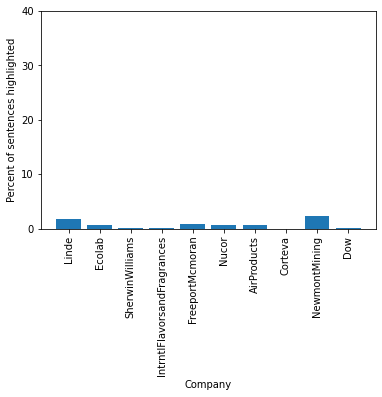

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Linde", "Ecolab", "SherwinWilliams", "IntrntlFlavorsandFragrances", "FreeportMcmoran", "Nucor", 
     "AirProducts", "Corteva", "NewmontMining", "Dow"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [14]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      0.726241
std       0.764670
min       0.000000
25%       0.139287
50%       0.609704
75%       0.862022
max       2.313167
dtype: float64

In [15]:
#storing variable so they can be called between notebooks (for aggregate analysis, test/train data sets, and modeling later on)

Materials_reltext = rel_text
Materials_alltext = all_text

%store Materials_reltext
%store Materials_alltext

Stored 'Materials_reltext' (list)
Stored 'Materials_alltext' (list)


In [16]:
def extract_sentences(text):
    sentences = []
    for report in text:
        for sent in report:
            sentences.append(sent)
    return sentences

In [17]:
pd.DataFrame(extract_sentences(Materials_reltext)).to_csv("Materials_reltext.csv", encoding = 'utf-8-sig')

In [19]:
pd.DataFrame(extract_sentences(Materials_alltext)).to_csv("Materials_alltext.csv", encoding = 'utf-8-sig')